### Imports

In [1]:
from selenium import webdriver           
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait#import webDriver
from bs4 import BeautifulSoup
sys.path.insert(0,'E:/Manoj/downloads')

ModuleNotFoundError: No module named 'selenium'

In [1]:
import pandas as pd
import numpy as np
import sys
import re
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

### Search for see all reviews button and click to load the reviews

In [49]:

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')                             
chrome_options.add_argument('--disable-dev-shm-usage')
selenium = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
selenium.get("https://play.google.com/store/apps/details?id=com.practo.fabric&utm_source=appgrooves&utm_medium=agp_81acc8a18b054eadad002f4c3e318133_com.practo.fabric_us_others_16676570314812")

##wait for the dom to load element and the target button/span is clickable
WebDriverWait(selenium,120).until(expected_conditions.element_to_be_clickable((By.XPATH,'.//span[contains(., "See all reviews") and @class="VfPpkd-vQzf8d"]'))).click()

#wait.until(expected_conditions.element_to_be_clickable((By.CSS_SELECTOR, '.VfPpkd-LgbsSe button'))).click()
#python_button = selenium.find_elements(By.CLASS_NAME,"VfPpkd-LgbsSe")[0]
#print(python_button)
#python_button.click()
#url = "https://www.amazon.in/"            #url 
#wd.get(url)        

C:\Users\info\AppData\Local\Temp\ipykernel_8940\1866220883.py:4: DeprecationWarning: use options instead of chrome_options
  selenium = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


### Scroll until the last review

In [70]:
reviews=[]
ratings=[]

### Once scroll is complete, find all the review divs and get the review comments plus the label (rating)

In [72]:
def get_reviews():
    html = selenium.page_source

    soup = BeautifulSoup(selenium.page_source,"html.parser")
    for review in soup.find_all(class_="RHo1pe"):
        ratings.append(review.find("div",class_="iXRFPc").attrs['aria-label'])
        reviews.append(review.find("div",class_="h3YV2d").text)

In [69]:
last_elem=""
while True:
    current_last_elem="div.RHo1pe:last-child"
    scroll = "document.querySelector(\'"+current_last_elem+"\').scrollIntoView();"
    selenium.execute_script(scroll)
    time.sleep(1)
    current_last_elem=selenium.find_elements(By.CLASS_NAME,"RHo1pe")[-1]
    if(last_elem==current_last_elem):
        break
    else:
        last_element = current_last_elem



KeyboardInterrupt



In [73]:
get_reviews()

In [74]:
df = pd.DataFrame({"Review":reviews,"ratings":ratings})

In [75]:
df.shape

(7160, 2)

In [77]:
df.to_csv("practo_app_reviews_raw_data.csv")

### Extract the rating number from raw label

In [2]:
data = pd.read_csv('practo_app_reviews_raw_data.csv')

In [3]:
data.head()

,Unnamed: 0,Review,ratings
0,0,Difficult to navigate but somewhat useful app....,Rated 1 stars out of five stars
1,1,I find the medical records section frustrating...,Rated 2 stars out of five stars
2,2,Really buggy software. And has this even been ...,Rated 1 stars out of five stars
3,3,The app keeps getting unresponsive. During con...,Rated 1 stars out of five stars
4,4,Everything is good but connecting to a differe...,Rated 3 stars out of five stars


In [4]:
data["ratings"]

0       Rated 1 stars out of five stars
1       Rated 2 stars out of five stars
2       Rated 1 stars out of five stars
3       Rated 1 stars out of five stars
4       Rated 3 stars out of five stars
                     ...               
7155    Rated 1 stars out of five stars
7156    Rated 5 stars out of five stars
7157    Rated 5 stars out of five stars
7158    Rated 5 stars out of five stars
7159    Rated 1 stars out of five stars
Name: ratings, Length: 7160, dtype: object

In [5]:
data["ratings"]=[rating[6] for rating in data["ratings"]]

In [6]:
data = data[["Review","ratings"]]

In [7]:
data.head()

,Review,ratings
0,Difficult to navigate but somewhat useful app....,1
1,I find the medical records section frustrating...,2
2,Really buggy software. And has this even been ...,1
3,The app keeps getting unresponsive. During con...,1
4,Everything is good but connecting to a differe...,3


1    3873
5    2124
4     464
2     386
3     313
Name: ratings, dtype: int64

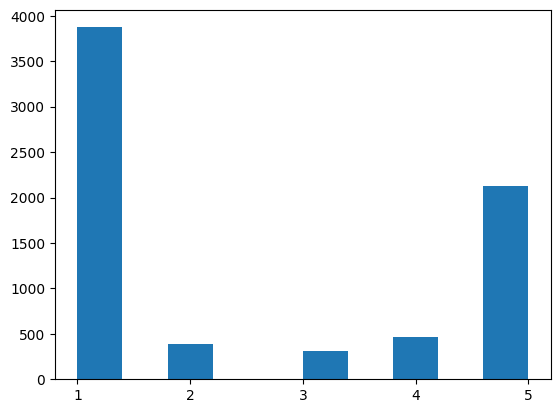

In [8]:
plt.hist(data["ratings"])
data.ratings.value_counts()

> there is not much data scraped for reviews 2,3 & 4

In [9]:
data[data["ratings"]=="1"].iloc[0].Review

"Difficult to navigate but somewhat useful app. With rapid changes to the app's UI it becomes really difficult to navigate through the various features. I don't see my appointments under the 'Appointments' menu, but rather they show up under 'Consultation' from where I cannot reschedule. It has also become confusing to search for a doctor. Update: video calling no longer works. Doctor tried calling but I did not get any notification even when app was open. Same problem with my friends."

In [10]:
data[data["ratings"]=="5"].iloc[0].Review

"Nice app easy to use authentic and reliable. doctors are available 24*7 and also good. they listen their patient very calmly and their prescribed treatment goes very well. must use this app. if you live in rural areas or hotspitals are far from your place or your want to avoid unnecessary queue or you want treatment asap this app is for you. I used this app many times for different age person's treatment, all the times doctor's were well versed and proficient. kindly go through this app."

#### sklearn,tensorflow and model imports

In [11]:
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
from keras.preprocessing import sequence, text

In [12]:
##lables until this point are in string type, encode them as classes 
lbl_enc = preprocessing.LabelEncoder()
data["ratings"] = lbl_enc.fit_transform(data["ratings"])

In [13]:
train_X,test_X,train_y,test_y=train_test_split(data["Review"],data["ratings"],test_size=0.25)

In [14]:
test_X

5568    I am really fedup with this app Unable to plac...
5466    not all clinics can be booked and we have to c...
6543    Bad exprience, never go for online consultatio...
3834    Worst App, dont go with it, they play very dir...
6963    Worst Customer service. Agent don't know their...
                              ...                        
2343    Cannot ask for more at this time.. very friend...
5534    Reports are very much delayed, connectivity pr...
4417    it's a good site for patients as well as docto...
5319    It was great.. Neelkrishna explained the proce...
2325    Pathatic service even doctor was unable to do ...
Name: Review, Length: 1790, dtype: object

 ### TFID - represention of words on term frequency and with the whole data

In [15]:
tfv = TfidfVectorizer(stop_words="english")
tfv.fit(list(train_X)+list(test_X))
train_X_tfv = tfv.transform(train_X)
test_X_tfv = tfv.transform(test_X)

In [51]:
def run_classification_model(model,X,y,X_test,y_test):
    pred = model.predict(X_test)
    y_pred = [np.argmax(y_) for y_ in pred]
    print(classification_report(y_test, y_pred,zero_division=1))
    plot_confusion_matrix(model,X_test,y_test)
    plt.show()
    return y_pred
    #print(f"precision: {precision_score(y_test,y_pred,average='weighted')}")
    #print(f"recall: {recall_score(y_test,y_pred,average='weighted')}")    
    #print(f"f1: {f1_score(y_test,y_pred,average='weighted')}")    

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       968
           1       1.00      0.00      0.00        90
           2       1.00      0.00      0.00        73
           3       1.00      0.00      0.00       120
           4       1.00      0.00      0.00       539

    accuracy                           0.54      1790
   macro avg       0.91      0.20      0.14      1790
weighted avg       0.75      0.54      0.38      1790



C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


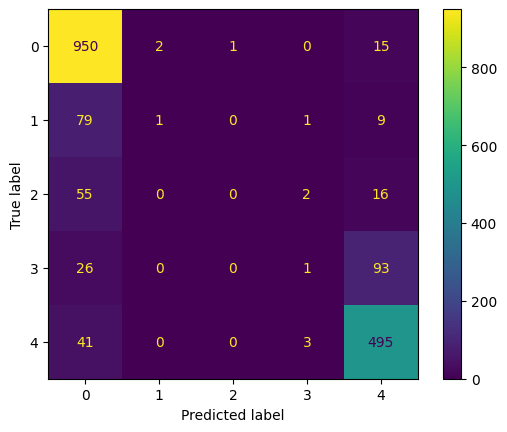

In [17]:
model =LogisticRegression()
model.fit(train_X_tfv,train_y)
y_pred =run_classification_model(model,train_X_tfv,train_y,test_X_tfv,test_y)

> Above metrices looks really bad, so using Logistic regression will not help here

In [18]:
y_pred[0]

0

In [23]:
test_X[2343]

'Cannot ask for more at this time.. very friendly app that helps with more suggestions along with ratings. thank you Practo team..'

In [24]:
np.argmax(model.predict_proba(tfv.transform([test_X[2343]])))

4

#### below sentiments are not great
> as TFID is just about considering the occurrance of a token within the sentence and the whole document, does'nt care much about the order of tokens. so below reviews have been given less rating even though they are positive reviews

In [25]:
np.argmax(model.predict_proba(tfv.transform(["not bad"])))

0

In [26]:
np.argmax(model.predict_proba(tfv.transform(["app did not crash anytime"])))

0

In [27]:
np.argmax(model.predict_proba(tfv.transform(["No issues with the app"])))

4

##### Word embeddings and neural networks

> using a word embedding from an already pretrained model over billions of words

> word embeddings represent each word in N-d vector space , where each dimension can be considered as a feature

In [14]:
word_embeddings={}

def extract_embeddings():
    f = open('../GloveEmbeddings/glove.6B.50d.txt/glove.6B.50d.txt', encoding='utf8')
    for line in tqdm(f):
        values = line.split()
        word = values[0]
        word_embeddings[word]=np.asarray(values[1:],dtype='float32')
        
    f.close()


In [15]:
extract_embeddings()

400000it [00:07, 50363.85it/s]


In [43]:
word_embeddings["good"]

array([-3.5586e-01,  5.2130e-01, -6.1070e-01, -3.0131e-01,  9.4862e-01,
       -3.1539e-01, -5.9831e-01,  1.2188e-01, -3.1943e-02,  5.5695e-01,
       -1.0621e-01,  6.3399e-01, -4.7340e-01, -7.5895e-02,  3.8247e-01,
        8.1569e-02,  8.2214e-01,  2.2220e-01, -8.3764e-03, -7.6620e-01,
       -5.6253e-01,  6.1759e-01,  2.0292e-01, -4.8598e-02,  8.7815e-01,
       -1.6549e+00, -7.7418e-01,  1.5435e-01,  9.4823e-01, -3.9520e-01,
        3.7302e+00,  8.2855e-01, -1.4104e-01,  1.6395e-02,  2.1115e-01,
       -3.6085e-02, -1.5587e-01,  8.6583e-01,  2.6309e-01, -7.1015e-01,
       -3.6770e-02,  1.8282e-03, -1.7704e-01,  2.7032e-01,  1.1026e-01,
        1.4133e-01, -5.7322e-02,  2.7207e-01,  3.1305e-01,  9.2771e-01],
      dtype=float32)

In [44]:
len(word_embeddings)

400000

#### embeddings of sentence -> Sentence to word vectors

In [16]:

def sent2vec(s):
    M=[]
    s = str(s).lower()
    words = word_tokenize(s)
    words = [w for w in words if not w in stop_words]
    
    for w in words:
        if w in word_embeddings:
            M.append(word_embeddings[w])
    #return np.array(M)
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())


In [91]:
sent2vec("good product")

array([-0.0214138 ,  0.02688246, -0.03879242,  0.04998184,  0.13647388,
        0.04322537, -0.12979673, -0.16345306,  0.08526365,  0.15732908,
        0.08161025,  0.07345302, -0.07126632, -0.06826955,  0.11671958,
        0.05631111,  0.05276725,  0.06546622,  0.04269324, -0.19520643,
        0.0046264 , -0.04109312,  0.01458712, -0.00661661,  0.05319544,
       -0.24368092, -0.15241577,  0.04022696,  0.17573254, -0.0213899 ,
        0.75765574,  0.08446726, -0.00543366, -0.03708455,  0.01696423,
       -0.0278111 , -0.04092358,  0.18185867,  0.0368434 , -0.13121063,
        0.03070246, -0.03340764, -0.03528648,  0.02419258,  0.01469254,
        0.03855224,  0.01609926,  0.11253115,  0.07538411,  0.17782675],
      dtype=float32)

In [18]:
x_train = [sent2vec(s) for s in tqdm(train_X)]
x_test = [sent2vec(s) for s in tqdm(test_X)]

100%|████████████████████████████████████████████████████████████████████████████| 1790/1790 [00:00<00:00, 1985.39it/s]


In [19]:
xtrain_glove = np.array(x_train)
xtest_glove = np.array(x_test)

In [87]:
xtest_glove

array([[ 0.06549927, -0.02500435,  0.0127248 , ..., -0.03213096,
         0.05884347,  0.07998997],
       [ 0.14454779, -0.01315168, -0.00384262, ...,  0.03330179,
        -0.03146345,  0.06778616],
       [ 0.07963534,  0.01138381, -0.00123745, ...,  0.05042415,
         0.01851241,  0.09073411],
       ...,
       [ 0.1553145 ,  0.03848371,  0.02451295, ...,  0.01463361,
        -0.01220669,  0.08127589],
       [ 0.0450137 ,  0.07122286, -0.14061274, ...,  0.01213093,
        -0.00759322,  0.06379715],
       [ 0.04126927,  0.02326322,  0.06342842, ..., -0.01459605,
        -0.01136653,  0.04434759]], dtype=float32)

##### Simple neural network using pre-trained embeddings

In [73]:
# scale the data before any neural net:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xtest_glove_scl = scl.transform(xtest_glove)


array([-0.06177928,  0.11739201, -0.0675324 , -1.2779944 , -0.3638968 ,
        0.56134415,  0.39490733, -0.53639275,  0.9443671 ,  0.5523605 ,
        0.5449134 ,  0.99994487,  0.7566108 , -1.4141881 , -0.57618266,
        0.16404738,  0.3177031 ,  0.3732298 , -1.0731312 , -0.5774507 ,
        0.9400102 , -1.1527635 ,  0.10045373, -1.244193  , -2.0134313 ,
        0.4545858 ,  0.6745774 , -0.37519926,  1.5272622 ,  1.4474716 ,
        0.9071815 ,  0.32551253,  0.5048202 ,  1.0968579 ,  1.9139398 ,
        0.40820622, -0.1542791 ,  0.55239785,  0.55276656,  0.383668  ,
        0.10498909, -0.85010606,  1.8739069 ,  0.27945822, -0.64908737,
        0.725284  , -0.59841216,  0.17078681, -0.38306138,  0.05632683],
      dtype=float32)

In [94]:
from sklearn.metrics  import plot_confusion_matrix,precision_score,recall_score,f1_score,classification_report
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import BatchNormalization,SpatialDropout1D, Embedding,LSTM
from keras.utils import np_utils
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [70]:
# we need to binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical(train_y)
yvalid_enc = np_utils.to_categorical(test_y)

In [82]:
# create a simple 3 layer sequential neural net
model = Sequential()

model.add(Dense(100, input_dim=50, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(5))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [83]:
model.fit(xtrain_glove_scl, y=ytrain_enc, batch_size=42, 
          epochs=100, verbose=1, 
          validation_data=(xtest_glove_scl, yvalid_enc))

Epoch 1/100
128/128 [==============================] - 2s 6ms/step - loss: 1.3400 - val_loss: 0.8919
Epoch 2/100
128/128 [==============================] - 1s 4ms/step - loss: 0.9493 - val_loss: 0.7983
Epoch 3/100
128/128 [==============================] - 0s 4ms/step - loss: 0.8621 - val_loss: 0.7749
Epoch 4/100
128/128 [==============================] - 0s 4ms/step - loss: 0.8339 - val_loss: 0.7610
Epoch 5/100
128/128 [==============================] - 0s 4ms/step - loss: 0.8118 - val_loss: 0.7581
Epoch 6/100
128/128 [==============================] - 0s 4ms/step - loss: 0.7968 - val_loss: 0.7558
Epoch 7/100
128/128 [==============================] - 0s 4ms/step - loss: 0.7733 - val_loss: 0.7543
Epoch 8/100
128/128 [==============================] - 0s 4ms/step - loss: 0.7640 - val_loss: 0.7506
Epoch 9/100
128/128 [==============================] - 0s 4ms/step - loss: 0.7614 - val_loss: 0.7472
Epoch 10/100
128/128 [==============================] - 0s 4ms/step - loss: 0.7565 - val_lo

128/128 [==============================] - 0s 4ms/step - loss: 0.5377 - val_loss: 0.8285
Epoch 82/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5364 - val_loss: 0.8345
Epoch 83/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5434 - val_loss: 0.8380
Epoch 84/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5337 - val_loss: 0.8368
Epoch 85/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5380 - val_loss: 0.8357
Epoch 86/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5377 - val_loss: 0.8435
Epoch 87/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5481 - val_loss: 0.8381
Epoch 88/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5211 - val_loss: 0.8466
Epoch 89/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5330 - val_loss: 0.8419
Epoch 90/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5227 - val_loss: 

#### there is clearly overfitting problem , model is not handling new data well as validation loss increases during epoch progress

In [33]:
def dense_net_prediction(s):
    word_vecs = sent2vec(s)
    pred_proba =model.predict(word_vecs.reshape(1,-1))
    print(f'predicted:{pred_proba}')

In [76]:
dense_net_prediction(xtest_glove_scl[2])
dense_net_prediction("app did not crash")
dense_net_prediction("Nice app for short term treatment")

1/1 [==============================] - 0s 112ms/step
predicted:[[0.8735011  0.0837389  0.01754711 0.00997741 0.0152355 ]]
1/1 [==============================] - 0s 33ms/step
predicted:[[0.8786194  0.08280905 0.01778021 0.00848703 0.01230439]]
1/1 [==============================] - 0s 32ms/step
predicted:[[0.81444925 0.09852501 0.02772186 0.02143641 0.03786746]]


In [77]:
train_y[train_y==4]
print(test_X.iloc[1331],ytrain_enc[1331])

Nice app for short term treatment. Doctor is very co-ordinating... [0. 0. 0. 0. 1.]


In [60]:
yvalid_enc = [np.argmax(y_) for y_ in yvalid_enc]

In [58]:
y_pred = model.predict(xtest_glove_scl)

56/56 [==============================] - 0s 2ms/step


In [59]:
y_pred = [np.argmax(y_) for y_ in y_pred]

In [63]:
print(classification_report(yvalid_enc, y_pred,zero_division=1))
#plot_confusion_matrix(model,xtrain_glove_scl,ytrain_enc)
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       959
           1       1.00      0.00      0.00        93
           2       0.00      0.00      0.00        79
           3       0.00      0.00      0.00       113
           4       0.76      0.84      0.79       546

    accuracy                           0.76      1790
   macro avg       0.51      0.36      0.33      1790
weighted avg       0.70      0.76      0.70      1790



C:\Users\manoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

In [87]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 70

token.fit_on_texts(list(train_X) + list(test_X))
xtrain_seq = token.texts_to_sequences(train_X)
xvalid_seq = token.texts_to_sequences(test_X)

# zero pad the sequences
xtrain_pad = pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

In [89]:
embedding_matrix = np.zeros((len(word_index) + 1, 50))
for word, i in tqdm(word_index.items()):
    embedding_vector = word_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████████████████████████████████████████████████████████████████████| 9295/9295 [00:00<00:00, 369571.10it/s]


In [97]:
# A simple LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     50,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [98]:
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/100
11/11 [==============================] - 12s 763ms/step - loss: 1.3017 - val_loss: 1.1894
Epoch 2/100
11/11 [==============================] - 6s 533ms/step - loss: 1.1694 - val_loss: 1.1208
Epoch 3/100
11/11 [==============================] - 6s 537ms/step - loss: 1.1238 - val_loss: 0.9909
Epoch 4/100
11/11 [==============================] - 6s 542ms/step - loss: 1.0307 - val_loss: 0.8911
Epoch 5/100
11/11 [==============================] - 6s 547ms/step - loss: 0.9638 - val_loss: 0.8410
Epoch 6/100
11/11 [==============================] - 6s 552ms/step - loss: 0.9451 - val_loss: 0.8327
Epoch 7/100
11/11 [==============================] - 6s 565ms/step - loss: 0.9283 - val_loss: 0.8325
Epoch 8/100
11/11 [==============================] - 6s 567ms/step - loss: 0.9174 - val_loss: 0.8219
Epoch 9/100
11/11 [==============================] - 6s 580ms/step - loss: 0.9154 - val_loss: 0.8055
Epoch 10/100
11/11 [==============================] - 6s 587ms/step - loss: 0.8967 - val_l

KeyboardInterrupt: 

In [104]:
y_pred=model.predict(xtrain_pad)

168/168 [==============================] - 4s 22ms/step


In [106]:
y_pred = [np.argmax(y_) for y_ in y_pred]

In [115]:
y_pred

[0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,


In [125]:
train_X[1331],train_y[1331]

("it's very simple app and helpful on finding good and bad about various food items. described in very simple English and makes it more reliable.",
 4)

In [130]:
seq=token.texts_to_sequences(["app is great"])
pad_seq=pad_sequences(seq, maxlen=max_len)

In [131]:
model.predict(pad_seq)

1/1 [==============================] - 0s 43ms/step


array([[0.12518701, 0.04386723, 0.0860995 , 0.22739294, 0.5174534 ]],
      dtype=float32)